# Practicum 1: RSA

**Naam**: Joep Demollin

Dit eerste practicum gaat over RSA. Het is echter nog steeds de bedoeling dat je alles wat hier geprogrammeerd zal worden ook met de hand en rekenmachine kan uitrekenen, maar vaak verkrijg je pas echt inzicht in een probleem als je het eens zelf implementeert. Het is dus sterk aangeraden zelf goed na te denken over wat je programmeert. Om jullie op weg te helpen is telkens de signatuur van de methodes gegeven, gelieve deze niet te veranderen. Je mag uiteraard zelf hulpmethodes en comments invoegen om je code duidelijker te maken. Er wordt af en toe gevraagd een antwoord aan te vullen in de notebook, het is overzichtelijker om dit in kleur te doen. 

## Modulaire exponentiatie

Voor het XS binair algoritme is de binaire voorstelling van een de exponent nodig. Vul de code in de onderstaande methode aan zodat de methode een lijst met enen en nullen terug geeft, die een binaire voorstelling van b is. De bit behorende bij de hoogste macht van 2 staat vanvoor in de lijst en de bit behorende bij de laagste macht van 2 staat vanachter.

In [8]:
import math

def bits(b):
    bits = []
    exp = math.floor(math.log2(b))

    while (exp >=0):
        if 2 ** exp <= b:
            bits.append(1)
            b -= 2 ** exp
        else:
            bits.append(0)
        exp -= 1

    return bits


Vul de onderstaande methode verder aan zodat het XS binair algoritme wordt geimplementeerd. Het resultaat is $r = a^b \mod{m}$.

In [9]:
def mod_exp(a, b, m):
    factors = []
    result = a
    binary_b = bits(b)

    for i in range(len(binary_b)-1, -1, -1):
        if binary_b[i] == 1:
            factors.append(result)
        result = result ** 2 % m

    return multiply_and_mod_array(factors, m)

def multiply_and_mod_array(array, mod):
    result = 1
    for number in array:
        result *= number
        result = result % mod
    return result

Vergelijk de snelheid van je implementatie met de naı̈ve en ingebouwde implementatie van
modulaire exponentiatie in python. (Hint: $\texttt{pow}$) Het resultaat is een mooie staafdiagram met drie staven met op de x-as de naam van de methode en op de y-as de snelheid in zelfgekozen eenheden.

224659
432980
294453


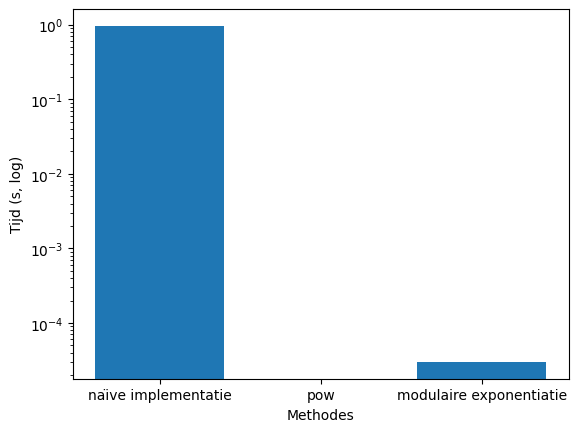

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

# genereer willekeurige getallen
a = random.randint(1, 5*10**5)
print(a)
b = random.randint(1, 5*10**5)
print(b)
m = random.randint(1, 5*10**5)
print(m)

# test methodes op getallen
times_simple_implementation = []
times_pow_implementation = []
times_xsbinary_implementation = []

for i in range(100):
    # simple method
    start_time = time.time()
    a**b % m
    end_time = time.time()
    times_simple_implementation.append(end_time-start_time)

    # using pow()
    start_time = time.time()
    pow(a,b,m)
    end_time = time.time()
    times_pow_implementation.append(end_time-start_time)

    # using xs binary algoritm
    start_time = time.time()
    mod_exp(a,b,m)
    end_time = time.time()
    times_xsbinary_implementation.append(end_time-start_time)


# plot resultaten
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xlabel('Methodes')
ax.set_ylabel('Tijd (s, log)')

# naı̈ve implementatie,  ingebouwde implementatie en eigen modulaire exponentiatie
dataY_as = [sum(times_simple_implementation) /100, sum(times_pow_implementation) /100, sum(times_xsbinary_implementation)/100]
ax.bar(['naı̈ve implementatie', 'pow', 'modulaire exponentiatie'], dataY_as)
plt.show()


In hoogstens een paar zinnen, leg kort uit waarom je deze resultaten kan verwachten.

**Antwoord**: Het was te verwachten dat de naïeve implementatie lang zou duren. Tot een hoge macht rekenen zonder tussendoor te vereenvoudigen gaat zware berekeningen opleveren. Wat mij verbaast is hoe efficiënt pow() werkt. Dat kan ik niet verklaren

## Pseudopriemtesten

Met een paar kleine aanpassingen kan je het XS binair algoritme gebruiken voor de sterke priemtest. Vul onderstaande methodes aan zodat de modulaire exponentiatie de sequentie van tussenstappen weergeeft (of minstens de laatste stappen, die relevant zijn voor de sterke priemtest). En zodat de methode strong_pseudoprime(a, m) deze sequentie inspecteert en de waarde True teruggeeft als het getal m slaagt voor de sterke a-pseudopriemtest.

In [ ]:
def mod_exp_seq(a, b, m):
    #vul aan
    return seq
    

In [ ]:
def strong_pseudoprime(a, m): 
    # vul aan
    if ...
        return False 
    else:
        return True
    

In [ ]:
print(strong_pseudoprime(2, 257))
print(strong_pseudoprime(2, 561))
print(strong_pseudoprime(2, 287))

In max. 1 zin per getal, wat kunnen we concluderen over de getallen uit bovenstaande getallen?

**Antwoord**:

## RSA

Bij RSA worden boodschappen niet noodzakelijk letter per letter vercijferd, maar in blokken van zo groot mogelijke
woorden. Bijvoorbeeld voor $2626<m \leq 262626$ krijgen blokken van lengte 2: $zz$ wordt $2626$ en $aa$ wordt $101$.
Het gebruikte alfabet is hieronder weergegeven.


|_|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|   0  | 1 | 2| 3| 4| 5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|


Implementeer eerst een methode die op basis van de modulus bepaalt hoe lang de woorden zijn.

In [ ]:
alfabet=' abcdefghijklmnopqrstuvwxyz'

In [ ]:
def length(m):
    #vul aan
    return l

Vul nu de volgende methode aan zodat de boodschap vercijferd wordt met de RSA methode. Het resultaat is een lijst met gehele getallen modulo $p\cdot q$. 
Je mag er van uit gaan dat de lengte van elke onversleutelde boodschap een veelvoud is van `length(p*q)`.
Als je wil kan je eerst aparte methoden schrijven om een boodschap naar een reeks (onversleutelde) getallen te vertalen en terug.

In [ ]:
def encrypt(message, e, p, q):
    #vul aan
    return encr

Om een boodschap te ontcijferen moet je ongeveer hetzelfde doen. Vul onderstaande methode verder aan zodat je een enkele string met de originele boodschap krijgt.

In [ ]:
def decrypt(numbers, d, p, q):
    #vul aan
    return decr

Als alles goed gaat moet het volgende True weergeven.

In [ ]:
message = 'test'
c = encrypt(message, 5, 19, 17)
w = decrypt(c, 173, 19, 17)
w == message

Ontcijfer volgende boodschappen. De decoderingssleutels heb je berekend tijdens oefeningenreeks 3.
- $(m, e) = (33, 3) \rightarrow [17, 26, 12, 12, 9, 0, 23, 9, 24, 12, 31]$
- $(m, e) = (8023, 3)\rightarrow [6018, 1053, 343, 1053, 3357, 5632]$

**Extra** (niet vereist voor het behalen van de 0.5 punten voor het examen): Schrijf een methode die gegeven een modulus $m$ en een encryptiesleutel $e$, de decryptiesleutel $d$ berekent. Voor verschillend groottes van $m$, vergelijk de snelheid van het ver- en ontsleutelen van boodschappen met de snelheid van het berekenen van $d$.